### Example 4 (real data)

#### This example shows how to use methods from the HTTomolibgpy library to do the following:
* calculate the centre of rotation using the Vo Centering method for large real data
* remove stripes using remove all stripes method
* reconstruct using the FBP algorithm

In [1]:
import os
import numpy as np
import cupy as cp
import scipy
import httomolibgpu
import matplotlib.pyplot as plt

# Load the sinogram data
path_lib = os.path.dirname(httomolibgpu.__file__)
in_file = os.path.abspath(os.path.join(path_lib, '..', "tests/test_data/","3600proj_sino.npz"))
l_infile = np.load(in_file)
sinogram = l_infile['sinogram']
angles = l_infile['angles']
sinogram = cp.asarray(sinogram)

print("The shape of the sinogram is {}".format(cp.shape(sinogram)))

The shape of the sinogram is (3601, 2560)


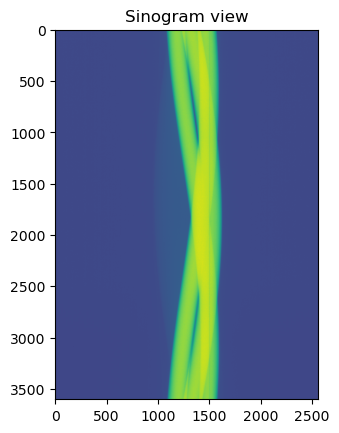

In [2]:
plt.figure()
plt.imshow(sinogram.get())
plt.title("Sinogram view")
plt.show()

In [3]:
from httomolibgpu.recon.rotation import find_center_vo
print ("Finding the Center of Rotation for the reconstruction")
cor = find_center_vo(sinogram)
print("The found Center of Rotation is {}".format(cor))

Finding the Center of Rotation for the reconstruction
WARNING!!!Global minimum is out of searching range
Please extend smax: 12.5
The found Center of Rotation is 1333.25


Remove stripes using remove_all_stripe


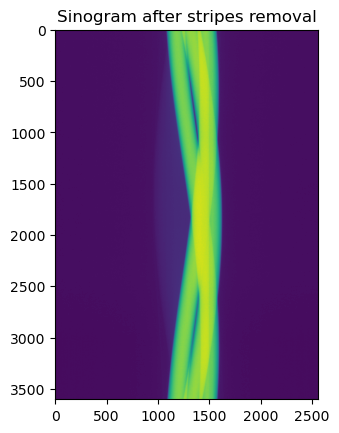

In [4]:
from httomolibgpu.prep.stripe import remove_all_stripe
print ("Remove stripes using remove_all_stripe")

sino3d = cp.ascontiguousarray(cp.ones((sinogram.shape[0], 3, sinogram.shape[1])), dtype=cp.float32)
sino3d[:,1,:] = sinogram

sino3d = remove_all_stripe(sino3d)

plt.figure()
plt.imshow(sino3d[:,1,:].get())
plt.title("Sinogram after stripes removal")
plt.show()

Perform Reconstruction using FBP


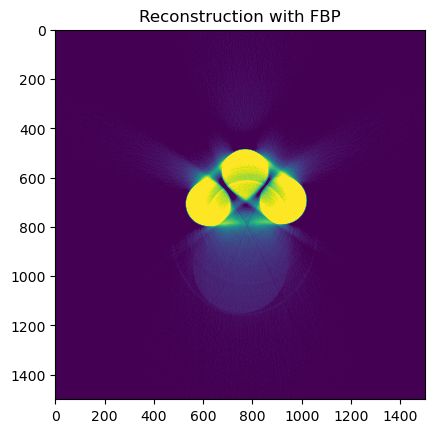

In [5]:
print ("Perform Reconstruction using FBP")
from httomolibgpu.recon.algorithm import FBP

reconFBP = FBP(sino3d, angles=angles, center=cor)
reconFBP_np = reconFBP.get()

plt.figure()
plt.imshow(reconFBP_np[500:2000,1,500:2000],vmin=0,vmax=0.01)
plt.title("Reconstruction with FBP")
plt.show()